In [1]:
from rslaser import cavity
from matplotlib import pyplot
import numpy as np
import time
from pykern.pkcollections import PKDict

# Cavity propagation notebook

This notebook propagates a wavefront through an optical cavity. It demonstrates the use of the cavity.py 
code.
The initial wavefront is a Hermite-Gaussian mode located at the center of a cavity
of length L_cav. There is a crystal located at the center of the cavity of length L_cryst. 
The wavefront is propagated through the crystal and then to the end of the cavity.

In [3]:
k=PKDict(
# Define Cavity length
L_cav = 1, #Length of cavity [m]

# Define right and left mirror focal lengths
df = 0.3, #Focal length difference from confocal case [m]
)
k.dfR = k.df
k.dfL = k.df
k.f=k.L_cav/4+k.df #focal length

k.lens_left_focal_length = k.f
k.lens_right_focal_length = k.f

#Define Crystal parameters
k.L_cryst = 0.1 #Length of crystal [m]
k.n0=1.75 #index of refraction on axis
k.n2=0.0 #radial variation of index of refraction: n(r) = n0 - 0.5 n2 r^2
k.drift_right_length=k.L_cav/2-k.L_cryst/2
k.drift_left_length=k.drift_right_length

#Define parameters for laser pulse starting at center of crystal
k.wavefrontEnergy = 1.55 #Wavefront Energy [eV]. 1.55 eV is 800 nm wavelength
k.lam = 1239.8*1e-9/k.wavefrontEnergy # convert energy [eV] to wavelength [m]
print('lam = %1.9f m' % k.lam)

k.L_eff = k.L_cav+(1/k.n0 - 1)*k.L_cryst #Define effective length as path length reduced by index of refraction n0
print("L_eff = %f m" % k.L_eff)
k.beta0 = np.sqrt(k.L_eff*k.f-k.L_eff**2/4)
print("beta0 = %f m" % k.beta0)
k.sigx0 = np.sqrt(k.lam*k.beta0/4/np.pi)
print("sigx0 = %f m" % k.sigx0)
k.sigrW = k.sigx0

k.nslice=5
k.sig_s=0.1 #rms length of Gaussian laser pulse [m]

k.L_half_cryst=k.L_cryst/2

lam = 0.000000800 m
L_eff = 0.957143 m
beta0 = 0.545342 m
sigx0 = 0.000186 m


In [5]:
#create laser cavity
lc = cavity.LaserCavity(k)

#nslice=nslice,L_half_cryst=L_cryst/2, 
#                        drift_right_length=drift_right_length,drift_left_length=drift_left_length, 
#                        lens_left_focal_length=lens_left_focal_length, 
#                        lens_right_focal_length=lens_right_focal_length,n0=n0,n2=n2,sigrW=sigx0

#output initial parameters
svals = lc.laser_pulse.pulsePos()
(lpsxvals,lpsyvals) = lc.laser_pulse.rmsvals()
ivals = lc.laser_pulse.intensity_vals()
evals = lc.laser_pulse.energyvals()

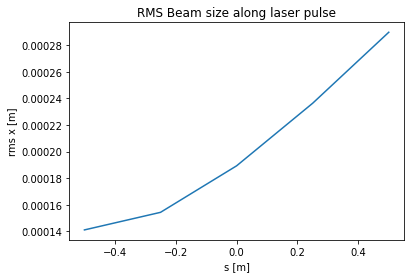

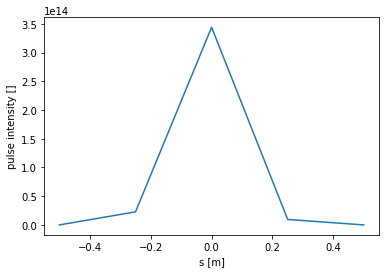

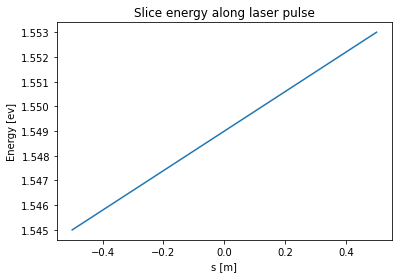

In [10]:
#Plot rms values along laser pulse
pyplot.plot(svals,lpsyvals)
pyplot.xlabel('s [m]')
pyplot.ylabel('rms x [m]')
pyplot.title('RMS Beam size along laser pulse')
pyplot.show()

#Plot pulse intensity along laser pulse
pyplot.plot(svals,ivals)
pyplot.ylabel('pulse intensity []')
pyplot.xlabel('s [m]')
pyplot.show()

pyplot.title('Slice energy along laser pulse')
pyplot.plot(svals,evals)
pyplot.xlabel('s [m]')
pyplot.ylabel('Energy [ev]')
pyplot.show()

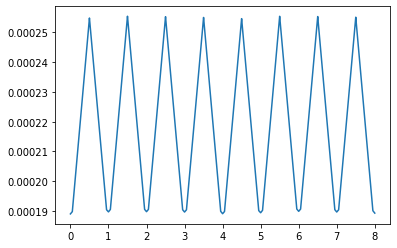

Simulation time: 45.45396 seconds


In [7]:
start_time = time.time()
(svals, sxvals, syvals) = lc.propagate(num_cycles=4)

fig, ax = pyplot.subplots()
ax.plot(svals, sxvals)
pyplot.show()
print("Simulation time: %s seconds" %(round((time.time() - start_time),5)))

In [8]:
#get final laser pulse rms values and intensity values along pulse
svals = lc.laser_pulse.pulsePos()
(lpsxvals,lpsyvals) = lc.laser_pulse.rmsvals()
ivals = lc.laser_pulse.intensity_vals()
evals = lc.laser_pulse.energyvals()


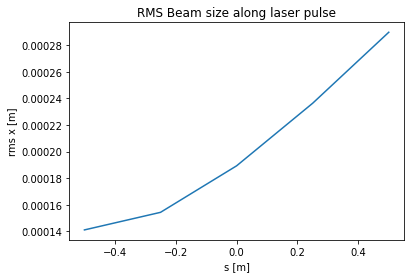

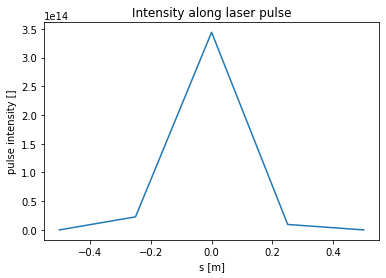

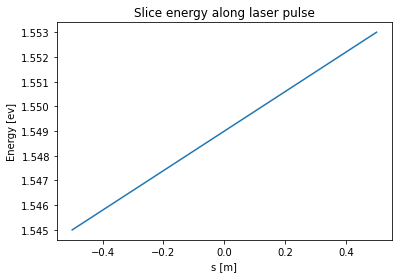

In [9]:
#Plots
pyplot.title('RMS Beam size along laser pulse')
pyplot.plot(svals,lpsyvals)
pyplot.xlabel('s [m]')
pyplot.ylabel('rms x [m]')
pyplot.show()

pyplot.title('Intensity along laser pulse')
pyplot.plot(svals,ivals)
pyplot.ylabel('pulse intensity []')
pyplot.xlabel('s [m]')
pyplot.show()

pyplot.title('Slice energy along laser pulse')
pyplot.plot(svals,evals)
pyplot.xlabel('s [m]')
pyplot.ylabel('Energy [ev]')
pyplot.show()